In [1]:
# 1. Read the dataset to the python environment.
# 2. Do necessary pre-processing steps.
# 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [122]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
# Read the dataset
df = pd.read_excel(r'C:\Users\Nisha\Downloads\supervisedlearningcasestudy\iris.xls')

In [4]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Check the number of rows and columns 
df.shape

(150, 5)

In [6]:
# Explore information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
# Provide statistical information
df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [124]:
# Check the null values
# Null values are present in SL,SW and PL
df.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [10]:
df['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

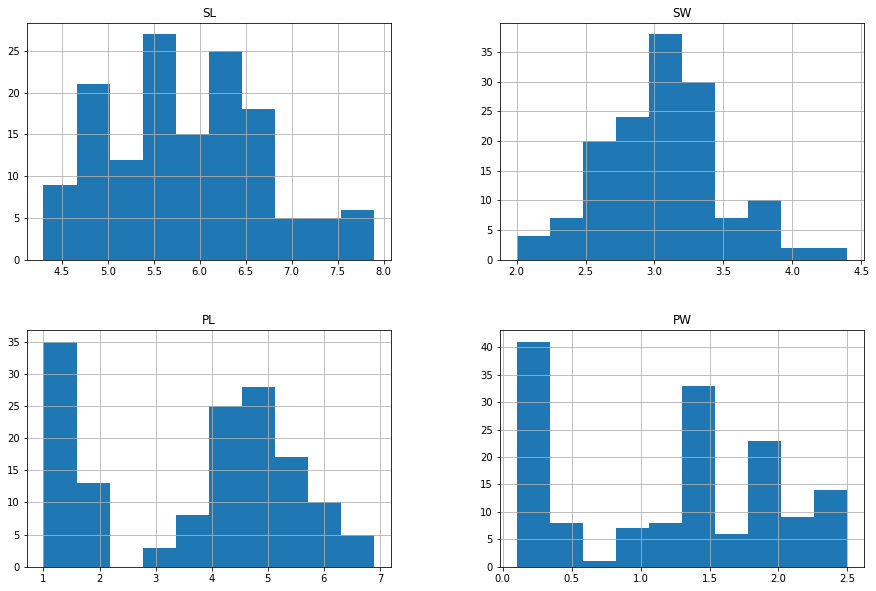

In [14]:
df.hist(figsize = (15,10))
plt.show()

<AxesSubplot:>

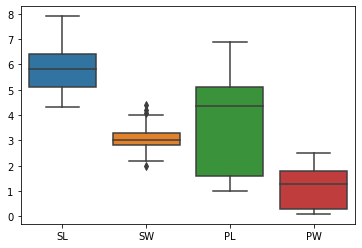

In [125]:
# Check whether outliers are present or not
# Outliers are present in SW
sns.boxplot(data=df[['SL','SW','PL','PW']])

In [86]:
df[df.SL.isnull()]

,SL,SW,PL,PW,Classification
2,NaN,3.2,1.3,0.2,Iris-setosa
21,NaN,3.7,1.5,0.4,Iris-setosa
39,NaN,3.4,1.5,0.2,Iris-setosa
51,NaN,3.2,4.5,1.5,Iris-versicolor
85,NaN,3.4,4.5,1.6,Iris-versicolor
106,NaN,2.5,4.5,1.7,Iris-virginica
141,NaN,3.1,5.1,2.3,Iris-virginica


In [126]:
df['SL'] = df['SL'].fillna(df.groupby('Classification')['SL'].transform('median'))

In [127]:
df['SW'] = df['SW'].fillna(df.groupby('Classification')['SW'].transform('median'))

In [128]:
df['PL'] = df['PL'].fillna(df.groupby('Classification')['PL'].transform('median'))

In [129]:
df.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

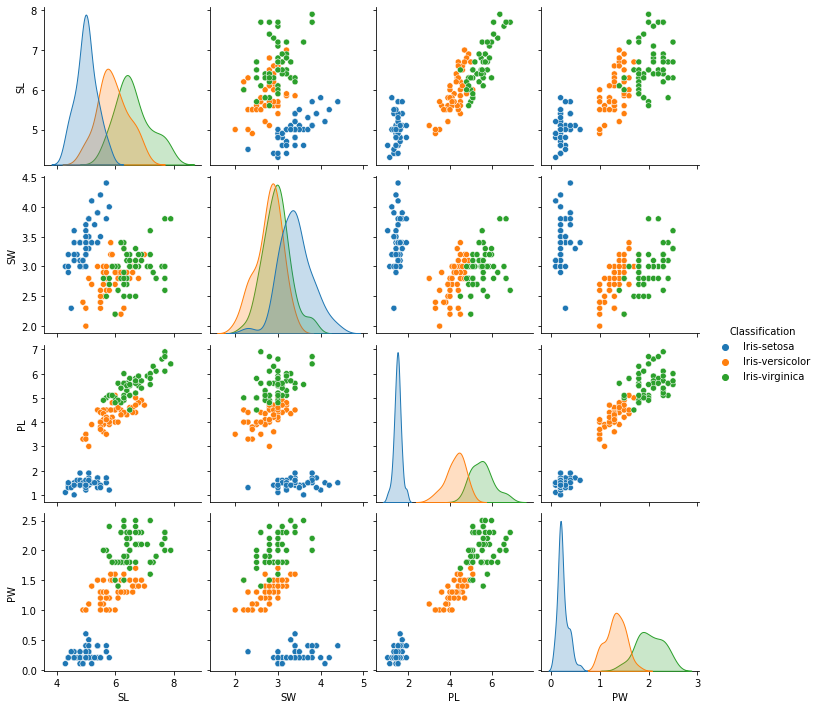

In [91]:
sns.pairplot(df,hue='Classification')
plt.show()

<AxesSubplot:>

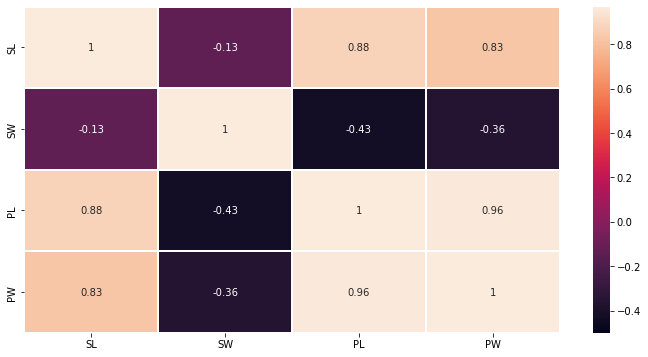

In [96]:
# PL and PW have high positive correlation
corrmatrix = df.corr()
plt.subplots(figsize = (12,6)) 
sns.heatmap(corrmatrix,vmin = -.5,vmax = 0.97,annot = True,linewidth = 0.2)

In [130]:
x = df.drop('Classification',axis=1)
y = df['Classification']

In [131]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['Classification'] = label.fit_transform(df['Classification'])  
df['Classification'].unique()

array([0, 1, 2])

In [12]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.0,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [67]:
# Split dataset to train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [68]:
print('x_train:',x_train.shape)
print('x_test:',x_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

x_train: (120, 4)
x_test: (30, 4)
y_train: (120,)
y_test: (30,)


In [69]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()
lm.fit(x_train,y_train)
y_pred = lm.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print('accuracy score is :',accuracy_score(y_test,y_pred))

accuracy score is : 1.0


In [70]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [71]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_predict=dt.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print('accuracy score is :',accuracy_score(y_test,y_pred))

accuracy score is : 1.0


In [72]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [73]:
# K-NN
from sklearn.neighbors import KNeighborsClassifier
acc_values = [] 
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k,metric = 'minkowski')
    classifier.fit(x_train,y_train)
    y_pred = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    acc_values.append(acc)
print(acc_values)  

[0.9666666666666667, 1.0, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 1.0, 1.0, 1.0, 1.0, 1.0]


Text(0, 0.5, 'Accuracy')

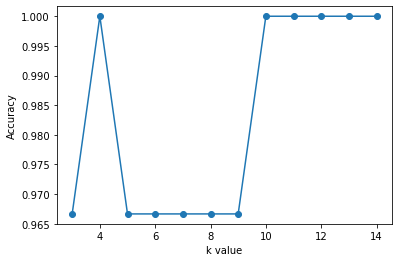

In [74]:
plt.plot(neighbors,acc_values, 'o-')
plt.xlabel('k value')
plt.ylabel('Accuracy')

In [93]:
classifier = KNeighborsClassifier(n_neighbors = 4,metric = 'minkowski')
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print('accuracy score is :',accuracy_score(y_test,y_pred))

accuracy score is : 1.0


In [94]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [137]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
y_predict=GB.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print('accuracy score is :',accuracy_score(y_test,y_pred))

accuracy score is : 1.0


In [138]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [78]:
# Random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,precision_score,recall_score
print('accuracy score is :',accuracy_score(y_test,y_pred))

accuracy score is : 1.0


In [79]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [132]:
# All these models showing 100% accuracy and all values in confusion matrix are correct
# Predict the classification for new values

In [80]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.0,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [81]:
df.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [91]:
data = {'SL':5.0, 'SW':3.4, 'PL':1.5, 'PW':0.2}
index = [0]
new_df = pd.DataFrame(data,index)
new_df

,SL,SW,PL,PW
0,5.0,3.4,1.5,0.2


In [92]:
# Predicted correctly 
pred_val = rf.predict(new_df)
pred_val

array(['Iris-setosa'], dtype=object)

In [ ]:
# Since this is a small dataset,there is a chance of overfitting.
# So we will do the cross validation and check the model

In [133]:
from sklearn.model_selection import cross_val_score
logreg=LogisticRegression()
print("Cross Validation Score is :",cross_val_score(logreg,x,y,cv=5,scoring='accuracy').mean())

Cross Validation Score is : 0.9733333333333334


C:\Users\Nisha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nisha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [134]:
from sklearn.model_selection import cross_val_score
dtree=DecisionTreeClassifier()
print("Cross Validation Score is :",cross_val_score(dtree,x,y,cv=5,scoring='accuracy').mean())


Cross Validation Score is : 0.9533333333333334


In [135]:
from sklearn.model_selection import cross_val_score
clf = KNeighborsClassifier(n_neighbors = 4)
print("Cross Validation Score is :",cross_val_score(clf,x,y,cv=5,scoring='accuracy').mean())

Cross Validation Score is : 0.9800000000000001


In [139]:
from sklearn.model_selection import cross_val_score
GBC=GradientBoostingClassifier()
print("Cross Validation Score is :",cross_val_score(GBC,x,y,cv=5,scoring='accuracy').mean())

Cross Validation Score is : 0.9533333333333334


In [136]:
from sklearn.model_selection import cross_val_score
rfc = RandomForestClassifier()
print("Cross Validation Score is :",cross_val_score(rfc,x,y,cv=5,scoring='accuracy').mean())

Cross Validation Score is : 0.9666666666666668


In [140]:
# All these models have more than 95% accuracy
# K_NN and logistic regression gives the best result.